# Обработка данных

In [1106]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display_html, HTML
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
plt.style.use('ggplot')
pd.options.display.max_columns = 200

In [1107]:
df = pd.read_csv("/Users/vsevolodparamonov/Downloads/шахматы_мнение.csv", index_col=0)

## Шаг 1: Первый взгляд на данные

*shape, head, columns, dtypes, describe*

In [1108]:
df.shape

(4038, 69)

In [1110]:
df.head()

,utc_date,utc_time,white,black,event,time_control,white_score,Username_x,Mode_x,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,playing_x,imported game_x,Username_y,Mode_y,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,playing_y,imported game_y
0,1,15,martingalimany,patchanko,Blitz,300+0,1.0,martingalimany,Blitz,0,808,1093,1304,0,0,0,0,0,0,0,0,0,0,5270,5155,2297,2815,158,0,10,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,patchanko,Blitz,0,0,1194,1247,0,0,0,0,0,0,1763,9,0,12,2108,1957,975,1039,94,13,1,13,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1,16,HenryCG,zzzUHzzz,Blitz,300+0,0.0,HenryCG,Blitz,0,1318,1531,1748,0,0,0,0,0,0,1591,0,0,0,5397,5374,2645,2628,124,8,9,1,0.0,0.0,0.0,0.0,15.0,1.0,NaN,zzzUHzzz,Blitz,0,0,1681,1764,0,0,0,0,0,0,1637,0,0,0,11600,11531,5548,5607,445,0,1,11,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,1,17,pijanstajn,jobemans,Blitz,180+0,1.0,pijanstajn,Blitz,1702,2200,2205,2443,0,0,0,0,0,0,2508,0,0,0,21116,20723,10263,9894,959,196,1,10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,jobemans,Blitz,0,2233,2232,2413,0,0,1718,2067,0,1737,2466,58,65,34,11191,11052,5574,5093,524,76,6,12,2007.0,1994.0,1473.0,0.0,4.0,NaN,NaN
3,1,17,IamHyperventilating,MomsRipper,Blitz,300+3,0.0,IamHyperventilating,Blitz,0,0,1533,0,0,0,0,0,0,0,1424,0,0,0,683,680,208,456,19,0,11,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,MomsRipper,Blitz,0,1587,1869,2044,2035,0,0,0,0,0,2271,0,0,0,29567,29527,24356,4129,1082,0,5,6,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1,18,RedD3v1l,shousernj,Blitz,180+0,1.0,RedD3v1l,Blitz,0,1487,1432,1385,0,0,0,0,0,0,1992,0,0,0,340,337,169,162,9,0,2,6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,shousernj,Blitz,0,0,1216,1671,0,0,0,0,0,0,1685,0,0,0,21587,21568,10508,10898,181,9,15,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [1111]:
df.columns

Index(['utc_date', 'utc_time', 'white', 'black', 'event', 'time_control',
       'white_score', 'Username_x', 'Mode_x', 'UltraBullet_x', 'Bullet_x',
       'Blitz_x', 'Rapid_x', 'Classical_x', 'Correspondence_x', 'Crazyhouse_x',
       'Chess960_x', 'Antichess_x', 'Horde_x', 'Puzzles_x', 'Puzzle Storm_x',
       'Puzzle Racer_x', 'Puzzle Streak_x', 'games_x', 'rated_x', 'wins_x',
       'losses_x', 'draws_x', 'bookmarks_x', 'win_streak_x', 'lose_streak_x',
       'King of the Hill_x', 'Three-check_x', 'Atomic_x', 'Racing Kings_x',
       'imported games_x', 'playing_x', 'imported game_x', 'Username_y',
       'Mode_y', 'UltraBullet_y', 'Bullet_y', 'Blitz_y', 'Rapid_y',
       'Classical_y', 'Correspondence_y', 'Crazyhouse_y', 'Chess960_y',
       'Antichess_y', 'Horde_y', 'Puzzles_y', 'Puzzle Storm_y',
       'Puzzle Racer_y', 'Puzzle Streak_y', 'games_y', 'rated_y', 'wins_y',
       'losses_y', 'draws_y', 'bookmarks_y', 'win_streak_y', 'lose_streak_y',
       'King of the Hill_y', 'Th

In [1112]:
label = LabelEncoder()

df["white_score"] = label.fit_transform(df["white_score"])

In [1113]:
df.head()

,utc_date,utc_time,white,black,event,time_control,white_score,Username_x,Mode_x,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,playing_x,imported game_x,Username_y,Mode_y,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,playing_y,imported game_y
0,1,15,martingalimany,patchanko,Blitz,300+0,2,martingalimany,Blitz,0,808,1093,1304,0,0,0,0,0,0,0,0,0,0,5270,5155,2297,2815,158,0,10,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,patchanko,Blitz,0,0,1194,1247,0,0,0,0,0,0,1763,9,0,12,2108,1957,975,1039,94,13,1,13,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1,16,HenryCG,zzzUHzzz,Blitz,300+0,0,HenryCG,Blitz,0,1318,1531,1748,0,0,0,0,0,0,1591,0,0,0,5397,5374,2645,2628,124,8,9,1,0.0,0.0,0.0,0.0,15.0,1.0,NaN,zzzUHzzz,Blitz,0,0,1681,1764,0,0,0,0,0,0,1637,0,0,0,11600,11531,5548,5607,445,0,1,11,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,1,17,pijanstajn,jobemans,Blitz,180+0,2,pijanstajn,Blitz,1702,2200,2205,2443,0,0,0,0,0,0,2508,0,0,0,21116,20723,10263,9894,959,196,1,10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,jobemans,Blitz,0,2233,2232,2413,0,0,1718,2067,0,1737,2466,58,65,34,11191,11052,5574,5093,524,76,6,12,2007.0,1994.0,1473.0,0.0,4.0,NaN,NaN
3,1,17,IamHyperventilating,MomsRipper,Blitz,300+3,0,IamHyperventilating,Blitz,0,0,1533,0,0,0,0,0,0,0,1424,0,0,0,683,680,208,456,19,0,11,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,MomsRipper,Blitz,0,1587,1869,2044,2035,0,0,0,0,0,2271,0,0,0,29567,29527,24356,4129,1082,0,5,6,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1,18,RedD3v1l,shousernj,Blitz,180+0,2,RedD3v1l,Blitz,0,1487,1432,1385,0,0,0,0,0,0,1992,0,0,0,340,337,169,162,9,0,2,6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,shousernj,Blitz,0,0,1216,1671,0,0,0,0,0,0,1685,0,0,0,21587,21568,10508,10898,181,9,15,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [1114]:
print(df.dtypes.unique())

df.dtypes

[dtype('int64') dtype('O') dtype('float64')]


utc_date              int64
utc_time              int64
white                object
black                object
event                object
                     ...   
Atomic_y            float64
Racing Kings_y      float64
imported games_y    float64
playing_y           float64
imported game_y     float64
Length: 69, dtype: object

In [1115]:
df.describe()

,utc_date,utc_time,white_score,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,playing_x,imported game_x,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,playing_y,imported game_y
count,4038.0,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.00000,4038.000000,4038.000000,300.000000,118.0,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4.038000e+03,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,4038.000000,209.000000,134.0
mean,1.0,176.352402,1.019564,95.697375,990.123576,1566.182268,1168.923972,365.962110,83.457900,85.635215,135.377415,49.128529,44.703071,1289.253591,3.863546,3.650322,3.450471,8044.315750,7749.425458,3884.485141,3823.942298,335.875929,9.578257,7.056464,5.874690,40.617385,46.474245,49.39475,23.836057,4.238732,1.596667,1.0,95.959881,1002.611689,1565.990094,1168.909113,353.443536,98.994056,78.448737,131.580485,48.701337,33.747152,1281.515849,3.679049,3.259287,3.257306,8.105188e+03,7702.318970,3922.570827,3835.055225,347.561912,12.368499,7.051511,5.935116,32.860575,44.938583,46.793710,17.010649,2.452452,2.483254,1.0
std,0.0,105.139641,0.977763,348.853176,748.666585,406.248746,814.222007,698.007622,371.818157,362.311398,450.649832,257.036556,268.700635,831.174234,10.435380,11.800718,10.662122,14134.516033,11539.245244,7261.859482,6186.546672,863.357932,68.842611,6.918062,6.879813,260.537481,267.914834,257.18226,192.970811,120.374342,3.054793,0.0,350.331817,746.319928,405.247630,812.618664,688.295564,405.927138,348.587247,447.494618,256.029298,232.094257,828.245003,10.108037,11.297402,10.542454,2.430690e+04,13511.386843,12391.325470,10332.019380,1669.520466,107.043339,6.263065,5.616446,234.008741,265.723335,248.496153,163.466699,47.181918,7.960899,0.0
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,1.0,84.250000,0.000000,0.000000,0.000000,1294.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1413.000000,1354.250000,679.000000,684.000000,52.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,1302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.362250e+03,1332.250000,652.250000,658.000000,50.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,1.0,174.000000,1.000000,0.000000,1148.000000,1594.000000,1459.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1563.000000,0.000000,0.000000,0.000000,4059.000000,3899.

## Шаг 2: Подготовление датасета

1) Удаление ненужных столбцов
2) Удаление дупликатов
3) Feature Engeneering

In [1116]:
def fix_time(s: str):
    fix = s.split('+')[0]
    return int(fix)

def add_time(s: str):
    add = s.split('+')[1]
    return int(add)

df["fix_time"] = df["time_control"].apply(fix_time)
df["add_time"] = df["time_control"].apply(add_time)

df.head()

,utc_date,utc_time,white,black,event,time_control,white_score,Username_x,Mode_x,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,playing_x,imported game_x,Username_y,Mode_y,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,playing_y,imported game_y,fix_time,add_time
0,1,15,martingalimany,patchanko,Blitz,300+0,2,martingalimany,Blitz,0,808,1093,1304,0,0,0,0,0,0,0,0,0,0,5270,5155,2297,2815,158,0,10,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,patchanko,Blitz,0,0,1194,1247,0,0,0,0,0,0,1763,9,0,12,2108,1957,975,1039,94,13,1,13,0.0,0.0,0.0,0.0,0.0,NaN,NaN,300,0
1,1,16,HenryCG,zzzUHzzz,Blitz,300+0,0,HenryCG,Blitz,0,1318,1531,1748,0,0,0,0,0,0,1591,0,0,0,5397,5374,2645,2628,124,8,9,1,0.0,0.0,0.0,0.0,15.0,1.0,NaN,zzzUHzzz,Blitz,0,0,1681,1764,0,0,0,0,0,0,1637,0,0,0,11600,11531,5548,5607,445,0,1,11,0.0,0.0,0.0,0.0,0.0,NaN,NaN,300,0
2,1,17,pijanstajn,jobemans,Blitz,180+0,2,pijanstajn,Blitz,1702,2200,2205,2443,0,0,0,0,0,0,2508,0,0,0,21116,20723,10263,9894,959,196,1,10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,jobemans,Blitz,0,2233,2232,2413,0,0,1718,2067,0,1737,2466,58,65,34,11191,11052,5574,5093,524,76,6,12,2007.0,1994.0,1473.0,0.0,4.0,NaN,NaN,180,0
3,1,17,IamHyperventilating,MomsRipper,Blitz,300+3,0,IamHyperventilating,Blitz,0,0,1533,0,0,0,0,0,0,0,1424,0,0,0,683,680,208,456,19,0,11,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,MomsRipper,Blitz,0,1587,1869,2044,2035,0,0,0,0,0,2271,0,0,0,29567,29527,24356,4129,1082,0,5,6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,300,3
4,1,18,RedD3v1l,shousernj,Blitz,180+0,2,RedD3v1l,Blitz,0,1487,1432,1385,0,0,0,0,0,0,1992,0,0,0,340,337,169,162,9,0,2,6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,shousernj,Blitz,0,0,1216,1671,0,0,0,0,0,0,1685,0,0,0,21587,21568,10508,10898,181,9,15,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180,0


In [1117]:
df = df.drop_duplicates(subset=['Username_x', 'Username_y', 'utc_date', 'utc_time'], keep='first')

In [1118]:
# удаляем все столбцы, где указан формат партии, мы и так знаем, что это Blitz
df.drop(columns=["event", "Mode_x", "Mode_y"], axis=1, inplace=True)

# удаляем ники игроков, так как вероятность того, что наш юзер выберет ту пару, которая уже играла между собой достаточно мала
df.drop(columns=["white", "black", "Username_x", "Username_y"], axis=1, inplace=True)

# imported games очень часто не указываются у шахматистов, как и признак playing, поэтому мы приняли решение его удалить
df.drop(columns=["playing_x", "imported game_x", "playing_y", "imported game_y"], axis=1, inplace=True)
# df.drop(columns=["playing_x", "imported game_x", "deviation_x", "playing_y", "imported game_y", "deviation_y"], axis=1, inplace=True)

# так как мы разделили временной формат на два столбца: фиксированное время и добавочное, он нам больше не нужен
df.drop(columns=["time_control"], axis=1, inplace=True)

df.dropna(inplace=True)

df.head()

,utc_date,utc_time,white_score,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,fix_time,add_time
0,1,15,2,0,808,1093,1304,0,0,0,0,0,0,0,0,0,0,5270,5155,2297,2815,158,0,10,2,0.0,0.0,0.0,0.0,0.0,0,0,1194,1247,0,0,0,0,0,0,1763,9,0,12,2108,1957,975,1039,94,13,1,13,0.0,0.0,0.0,0.0,0.0,300,0
1,1,16,0,0,1318,1531,1748,0,0,0,0,0,0,1591,0,0,0,5397,5374,2645,2628,124,8,9,1,0.0,0.0,0.0,0.0,15.0,0,0,1681,1764,0,0,0,0,0,0,1637,0,0,0,11600,11531,5548,5607,445,0,1,11,0.0,0.0,0.0,0.0,0.0,300,0
2,1,17,2,1702,2200,2205,2443,0,0,0,0,0,0,2508,0,0,0,21116,20723,10263,9894,959,196,1,10,0.0,0.0,0.0,0.0,0.0,0,2233,2232,2413,0,0,1718,2067,0,1737,2466,58,65,34,11191,11052,5574,5093,524,76,6,12,2007.0,1994.0,1473.0,0.0,4.0,180,0
3,1,17,0,0,0,1533,0,0,0,0,0,0,0,1424,0,0,0,683,680,208,456,19,0,11,1,0.0,0.0,0.0,0.0,0.0,0,1587,1869,2044,2035,0,0,0,0,0,2271,0,0,0,29567,29527,24356,4129,1082,0,5,6,0.0,0.0,0.0,0.0,0.0,300,3
4,1,18,2,0,1487,1432,1385,0,0,0,0,0,0,1992,0,0,0,340,337,169,162,9,0,2,6,0.0,0.0,0.0,0.0,0.0,0,0,1216,1671,0,0,0,0,0,0,1685,0,0,0,21587,21568,10508,10898,181,9,15,2,0.0,0.0,0.0,0.0,0.0,180,0


In [1119]:
df.shape

(4038, 59)

In [1120]:
df.isna().sum().sum()

0

# Feature Engeneering

1) Доля побед

In [1121]:
df['prop_x'] = df['wins_x'] / df['games_x']
df['prop_y'] = df['wins_y'] / df['games_y']

2) Отношение побед к поражениям

In [1122]:
df['win2loss_x'] = df['wins_x'] / df['losses_x']
df['win2loss_y'] = df['wins_y'] / df['losses_y']

3) Разница в рейтингах

In [1123]:
df['win2loss_x'] = abs(df['rated_x'] - df['rated_y'])

4) Индикатор того, что рейтинг в режиме Blitz выше среднего

In [1124]:
df['ind_greater_mean_x'] = (df['Blitz_x'].values > df[['Blitz_x', 'Blitz_y']].values.mean()) * 1
df['ind_greater_mean_y'] = (df['Blitz_x'] > df[['Blitz_x', 'Blitz_y']].values.mean()) * 1

In [1125]:
df.head()

,utc_date,utc_time,white_score,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,fix_time,add_time,prop_x,prop_y,win2loss_x,win2loss_y,ind_greater_mean_x,ind_greater_mean_y
0,1,15,2,0,808,1093,1304,0,0,0,0,0,0,0,0,0,0,5270,5155,2297,2815,158,0,10,2,0.0,0.0,0.0,0.0,0.0,0,0,1194,1247,0,0,0,0,0,0,1763,9,0,12,2108,1957,975,1039,94,13,1,13,0.0,0.0,0.0,0.0,0.0,300,0,0.435863,0.462524,3198,0.938402,0,0
1,1,16,0,0,1318,1531,1748,0,0,0,0,0,0,1591,0,0,0,5397,5374,2645,2628,124,8,9,1,0.0,0.0,0.0,0.0,15.0,0,0,1681,1764,0,0,0,0,0,0,1637,0,0,0,11600,11531,5548,5607,445,0,1,11,0.0,0.0,0.0,0.0,0.0,300,0,0.490087,0.478276,6157,0.989477,0,0
2,1,17,2,1702,2200,2205,2443,0,0,0,0,0,0,2508,0,0,0,21116,20723,10263,9894,959,196,1,10,0.0,0.0,0.0,0.0,0.0,0,2233,2232,2413,0,0,1718,2067,0,1737,2466,58,65,34,11191,11052,5574,5093,524,76,6,12,2007.0,1994.0,1473.0,0.0,4.0,180,0,0.486030,0.498079,9671,1.094443,1,1
3,1,17,0,0,0,1533,0,0,0,0,0,0,0,1424,0,0,0,683,680,208,456,19,0,11,1,0.0,0.0,0.0,0.0,0.0,0,1587,1869,2044,2035,0,0,0,0,0,2271,0,0,0,29567,29527,24356,4129,1082,0,5,6,0.0,0.0,0.0,0.0,0.0,300,3,0.304539,0.823756,28847,5.898765,0,0
4,1,18,2,0,1487,1432,1385,0,0,0,0,0,0,1992,0,0,0,340,337,169,162,9,0,2,6,0.0,0.0,0.0,0.0,0.0,0,0,1216,1671,0,0,0,0,0,0,1685,0,0,0,21587,21568,10508,10898,181,9,15,2,0.0,0.0,0.0,0.0,0.0,180,0,0.497059,0.486774,21231,0.964214,0,0


In [1126]:
df.to_csv("chess_preprocessed_csv")

# EDA, щупаем данные

## Шаг 1: Для начала посмотрим какие интересные связи можно заметить между непосредственными соперниками

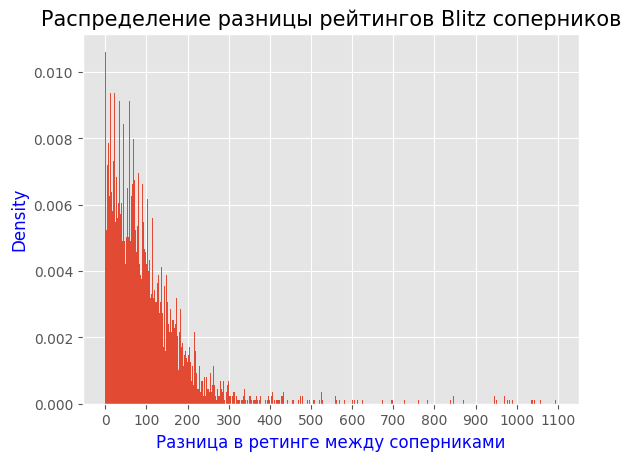

In [1127]:
diff = abs(df["Blitz_x"] - df["Blitz_y"])

plt.hist(diff[diff < 1100], bins=500, density=True)
plt.xlabel("Разница в ретинге между соперниками", color="blue", fontsize=12)
plt.ylabel("Density", color="blue", fontsize=12)
plt.xticks(np.arange(0, 1101, 100))
plt.title("Распределение разницы рейтингов Blitz соперников", fontsize=15)
plt.show()

__Вывод__: *Также можем посмотреть на распределение разницы рейтингов соперников, тогда мы увидим, что логично, игроки играют с равными себе по уровню*

In [1128]:
diff[abs(diff) > 100].size / diff.size

0.382862803368004

__Вывод__: более трети игр проводится с разницой в рейтинге большей, чем 100, что говорит о том что на личессе шахматисты часто мэтчатся для блитс игр с довольно непохожими соперниками, возможно это связано с тем, что многие игроки до сих пор имеют дефолтный рейтинг личесс - 1500 и им в пары ставят более низкорейтинговых игроков

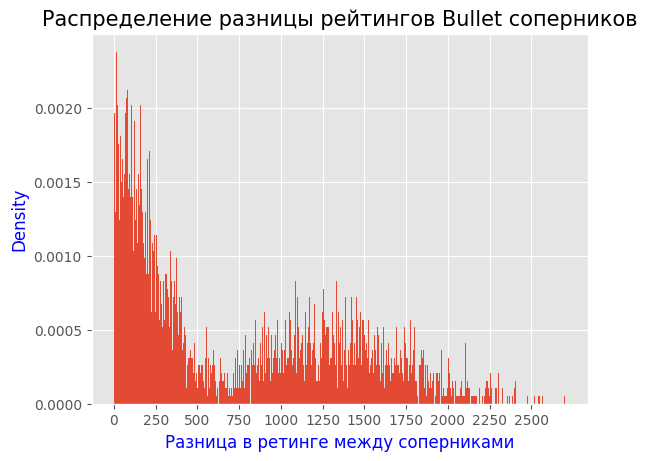

In [1129]:
diff = abs(df["Bullet_x"] - df["Bullet_y"])

plt.hist(diff[diff > 0], bins=500, density=True)
plt.xlabel("Разница в ретинге между соперниками", color="blue", fontsize=12)
plt.ylabel("Density", color="blue", fontsize=12)
plt.xticks(np.arange(0, 2501, 250))
plt.title("Распределение разницы рейтингов Bullet соперников", fontsize=15)
plt.show()

__Вывод__: казалось бы временной формат Bullet самый похожий на Blitz, однако приэтом у соперников не прослеживается похожесть распределений разниц рейтингов в Blitz с разницой рейтингов в Bullet, что все же говорит о том, что некоторым страшно играть с таким малым временем как минута, либо же просто неинтересно)

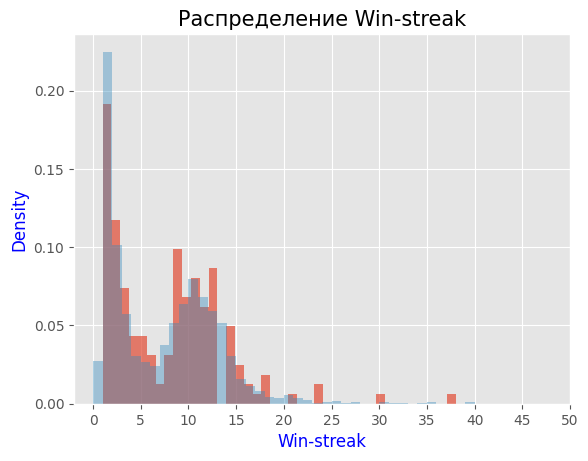

In [1130]:
win_streak_x_winner = df["win_streak_x"][df["white_score"] == 1].values
win_streak_y_winner = df["win_streak_y"][df["white_score"] == 0].values
np.append(win_streak_x_winner, win_streak_y_winner)

win_streak_x_loser = df["win_streak_x"][df["white_score"] == 0].values
win_streak_y_loser = df["win_streak_y"][df["white_score"] == 1].values
np.append(win_streak_x_loser, win_streak_y_loser)

plt.hist(win_streak_x_winner[win_streak_x_winner < 50], bins=40, alpha=0.7, density=True)
plt.hist(win_streak_x_loser[win_streak_x_loser < 50], bins=40, alpha=0.4, density=True)
plt.xticks(np.arange(0, 51, 5))
plt.ylabel("Density", color="blue", fontsize=12)
plt.xlabel("Win-streak", color="blue", fontsize=12)
plt.title("Распределение Win-streak", fontsize=15)
plt.show()

__Вывод__: Видим, что win_streak не влияет почти что на то, попедит игрок в следующей партии или же нет

## Шаг 2: Теперь посмотрим на интересные заокномерности в режимах игр, по всем игрокам вместе, не учитывая соперничество

In [1131]:
d = df["Blitz_x"]
g = df["Blitz_y"]

dg = pd.concat([d, g], axis=0, ignore_index=True)
dg.shape

(8076,)

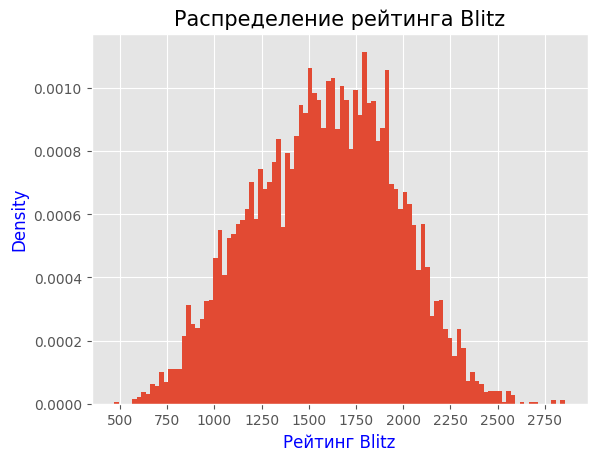

In [1132]:
plt.hist(dg[dg > 0], bins=100, density=True)
plt.xlabel("Рейтинг Blitz", color="blue", fontsize=12)
plt.ylabel("Density", color="blue", fontsize=12)
plt.xticks(np.arange(500, 2751, 250))
plt.title("Распределение рейтинга Blitz", fontsize=15)
plt.show()

__Вывод__: распределение рейтингов в Blitz похоже на нормальное, с мат ожиданием в 1500, что логично, ведь это дефолтный рейтинг, который выдает лтчесс, при регистрации

In [1133]:
df["add_time"].value_counts(normalize=True)

add_time
0    0.691184
2    0.184745
3    0.117632
1    0.002972
5    0.001981
4    0.001238
6    0.000248
Name: proportion, dtype: float64

__Вывод__: люди почти в 75% случаев играют без добавочного времени, либо предпочитают вриант 2 секунды, который часто предлагается в качестве основного

In [1134]:
df["fix_time"].value_counts(normalize=True)

fix_time
180    0.552254
300    0.443289
120    0.001238
420    0.000991
240    0.000743
60     0.000495
0      0.000495
360    0.000248
90     0.000248
Name: proportion, dtype: float64

__Вывод__: Чаще всего люди играют в 3 и 5 минутки, что опять же является эталоном данного формата партий, причем партии покороче (3 мин) предпочитают чуть сильнее более долгим (5 мин)

In [1135]:
print(f"Количество признаков, которые более чем на 2/3 разрежены: {df[df == 0].count().sort_values(ascending=False)[df[df == 0].count().sort_values(ascending=False).values > df.shape[0] / 1.5].count()}")

df[df == 0].count().sort_values(ascending=False)[df[df == 0].count().sort_values(ascending=False).values > df.shape[0] / 1.5]

Количество признаков, которые более чем на 2/3 разрежены: 31


Racing Kings_y        3994
Racing Kings_x        3976
King of the Hill_y    3958
Horde_y               3953
King of the Hill_x    3940
Horde_x               3927
Three-check_y         3923
Three-check_x         3917
Atomic_y              3895
Antichess_y           3892
Antichess_x           3891
Atomic_x              3889
Correspondence_x      3840
Crazyhouse_y          3839
Crazyhouse_x          3820
Correspondence_y      3805
imported games_y      3790
imported games_x      3770
UltraBullet_y         3745
UltraBullet_x         3744
Chess960_y            3710
Chess960_x            3697
Puzzle Racer_y        3640
Puzzle Racer_x        3576
Puzzle Streak_y       3491
Puzzle Streak_x       3436
Puzzle Storm_y        3423
Puzzle Storm_x        3401
Classical_y           3169
Classical_x           3139
add_time              2791
dtype: int64

__Вывод__: мы имеем очень разреженные данные, в частности по признакам, которые отвечают за странные форматы игры: без дам, с перемещенными фигурами и так далее

In [1136]:
d = df[["games_x", "rated_x"]]
k = df[["games_y", "rated_y"]].rename(columns={"games_y": "games_x", "rated_y": "rated_x"})

dk = pd.concat([d, k], ignore_index=True)

dk = dk.rename(columns={"games_x": "games", "rated_x": "rated"})

dk.shape

(8076, 2)

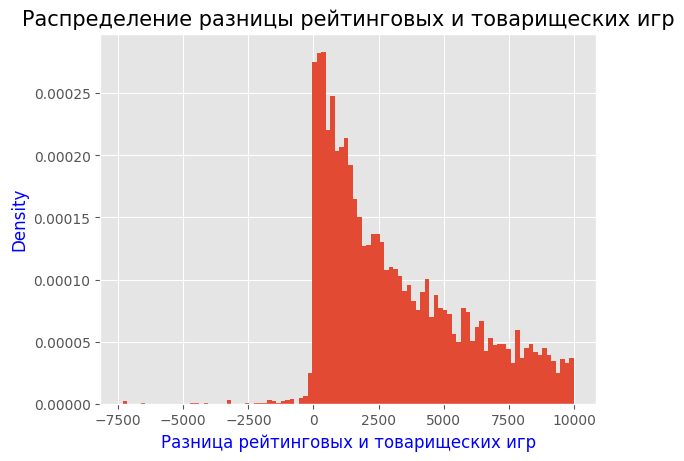

In [1137]:
diff_status = dk["rated"] - (dk["games"] - dk["rated"])

plt.hist(diff_status[(diff_status < 10000) & (diff_status > -10000)], bins=100, density=True)
plt.xlabel("Разница рейтинговых и товарищеских игр", color="blue", fontsize=12)
plt.ylabel("Density", color="blue", fontsize=12)
plt.title("Распределение разницы рейтинговых и товарищеских игр", fontsize=15)
plt.show()

__Вывод__: Люди намного чаще играют рейтинговые игры, нежели товарищеские, однако если смотреть на моду, то она находится примерно в нуле

In [1138]:
df["utc_time"].apply(hour).value_counts()

utc_time
1    4038
Name: count, dtype: int64

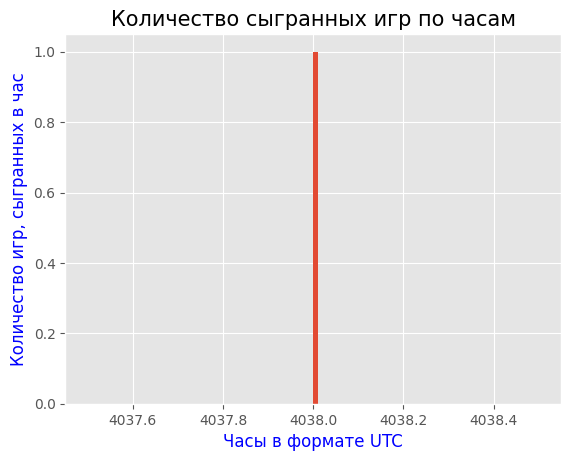

In [1139]:
def hour(seconds: int) -> int:
    return seconds // 3600 + 1

hours = df["utc_time"].apply(hour).value_counts()

plt.hist(hours, bins=100)
plt.xlabel("Часы в формате UTC", color="blue", fontsize=12)
plt.ylabel("Количество игр, сыгранных в час", color="blue", fontsize=12)
plt.title("Количество сыгранных игр по часам", fontsize=15)
plt.show()

__Вывод__: 

In [1140]:
df["black_score"] = abs(df["white_score"] - 1)

dh = pd.concat([df[["white_score", "UltraBullet_x", "Bullet_x", "Blitz_x", "Rapid_x", "Puzzles_x"]],
               df[["black_score", "UltraBullet_y", "Bullet_y", "Blitz_y", "Rapid_y", "Puzzles_y"]]], axis=0)

dh = dh[["white_score", "UltraBullet_x", "Bullet_x", "Blitz_x", "Rapid_x", "Puzzles_x"]]
dh.rename(columns={"UltraBullet_x": "UltraBullet", "Bullet_x": "Bullet", "Blitz_x": "Blitz", "Rapid_x": "Rapid", "Puzzles_x": "Puzzles_x"}, inplace=True)

df.drop("black_score", axis=1, inplace=True)
dh.shape

(8076, 6)

In [1141]:
corr = dh.corr()
corr.style.background_gradient(cmap='coolwarm')

,white_score,UltraBullet,Bullet,Blitz,Rapid,Puzzles_x
white_score,1.000000,0.000202,0.018031,0.045220,-0.005214,0.014024
UltraBullet,0.000202,1.000000,0.299981,0.190393,0.185116,0.183007
Bullet,0.018031,0.299981,1.000000,0.409400,0.350581,0.323129
Blitz,0.045220,0.190393,0.409400,1.000000,0.269622,0.278331
Rapid,-0.005214,0.185116,0.350581,0.269622,1.000000,0.306484
Puzzles_x,0.014024,0.183007,0.323129,0.278331,0.306484,1.000000


__Вывод__: заметим, что самая большая корреляция действительно наблюдается между рейтингом в Blitz и Bullet, также стоит отметить, что решение пазлов лучше больше всего влияет на Bullet, что интересно, ведь действительно когда мало времени на раздумие, нужно действовать на интуиции, которая сильнее всего развивается при помощи нарешивания пазлов

In [1142]:
corr["white_score"].sort_values()

Rapid         -0.005214
UltraBullet    0.000202
Puzzles_x      0.014024
Bullet         0.018031
Blitz          0.045220
white_score    1.000000
Name: white_score, dtype: float64

__Вывод__: очевидно, что рейтинг в Blitz оказывает наибольшее влияние на результаты в партиях Blitz, однако стоит заметить, что Bullet опять же, оказывает некоторое влияение на результаты

## Шаг 3: Давайте теперь попробуем разными способами определить, 10 наиболее важных признаков

In [1143]:
X = df.drop('white_score', axis=1)
y = df['white_score']

In [1144]:
# Создание экземпляра PCA
pca = PCA()

# Применение PCA к данным
transformed_data = pca.fit_transform(df)

# Получение коэффициентов компонент PCA
components = pca.components_

# Определение основных признаков
top_features_indices = np.abs(components[0]).argsort()[-10:][::-1]  # Пример для первой компоненты

# Получение названий основных признаков
top_features_names = df.columns[top_features_indices]

pca = pd.DataFrame({"top_features": top_features_names})

In [1145]:
# Создание и обучение модели случайного леса
model = RandomForestClassifier()
model.fit(X, y)

# Получение важности признаков
feature_importances = model.feature_importances_

# Сортировка признаков по важности
top_features_indices = np.argsort(feature_importances)[::-1][:10]
top_features = X.columns[top_features_indices]

# Вывод топ 10 признаков
rd = pd.DataFrame({'top_features': top_features})

In [1146]:
# Создание DataFrame с признаками и целевой переменной
data = pd.concat([X, y], axis=1)

# Рассчет корреляции между признаками и целевой переменной
correlation = data.corr()

# Сортировка признаков по абсолютному значению корреляции
top_features = correlation.abs().nlargest(11, 'white_score')['white_score'].index[1:]

# Вывод топ 10 признаков
cr = pd.DataFrame({'top_features': top_features})

In [1147]:
# Создание модели для рекурсивного удаления признаков
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10)

# Обучение модели
selector.fit(X, y)

# Получение отобранных признаков
top_features_indices = selector.support_
top_features = X.columns[top_features_indices]

# Вывод топ 10 признаков
rfe = pd.DataFrame({'top_features': top_features})

# Сравнение топовых признаков разными способами

In [1148]:
df1_styler = rd.style.set_table_attributes("style='display:inline;'").set_caption('RandomForest Classifier')
df2_styler = cr.style.set_table_attributes("style='display:inline;'").set_caption('Корреляции с целевой переменной')
df3_styler = rfe.style.set_table_attributes("style='display:inline;'").set_caption('Рекурсивное удаление признаков')
df4_styler = pca.style.set_table_attributes("style='display:inline;'").set_caption('PCA')


caption_style = "margin-bottom: 20px;"

df1_styler = df1_styler.set_caption(df1_styler.caption + f"<div style='{caption_style}'></div>")
df2_styler = df2_styler.set_caption(df2_styler.caption + f"<div style='{caption_style}'></div>")
df3_styler = df3_styler.set_caption(df3_styler.caption + f"<div style='margin-bottom: 5px;'></div>")
df4_styler = df4_styler.set_caption(df4_styler.caption + f"<div style='margin-bottom: 34px;'></div>")


space = "\xa0" * 30

display_html(space + df1_styler._repr_html_() + space + df2_styler._repr_html_() + space + df3_styler._repr_html_() + space + df4_styler._repr_html_(), raw=True)


,top_features
0,prop_x
1,win2loss_y
2,prop_y
3,Blitz_y
4,Blitz_x
5,utc_time
6,draws_x
7,win2loss_x
8,draws_y
9,Puzzles_y


In [1149]:
rd.values[1][0]

'win2loss_y'

In [1150]:
methods = [rd, cr, rfe, pca]
features = defaultdict(int)

for reduction in methods:
    for coef in range(10):
        features[reduction.values[coef][0]] += abs(10 - coef)

items = features.items()

sorted_items = sorted(items, key=lambda x: x[1], reverse=True)

for key, value in sorted_items:
    print(key, value)


prop_x 24
prop_y 20
win2loss_y 19
games_y 18
games_x 15
wins_y 14
Blitz_x 13
losses_y 12
win2loss_x 11
draws_y 10
losses_x 10
rated_y 9
Blitz_y 7
Puzzle Racer_y 6
utc_time 5
ind_greater_mean_x 5
ind_greater_mean_y 5
draws_x 4
rated_x 4
Puzzle Racer_x 3
Puzzles_y 2
Puzzle Storm_y 2
wins_x 2


__Вывод__: использовав несколько различных способов ранжирования признаков по их информативности и объединив их взвешенно, мы получаем следующий список, которые логически также интерпретируем: важнее всего рейтинг Blitz в Blitz играх, разделения всех игр на победы, поражения и ничьи, пазлы, которые помогают шахматисту быстрее думать в стандартных ситуациях и так далее

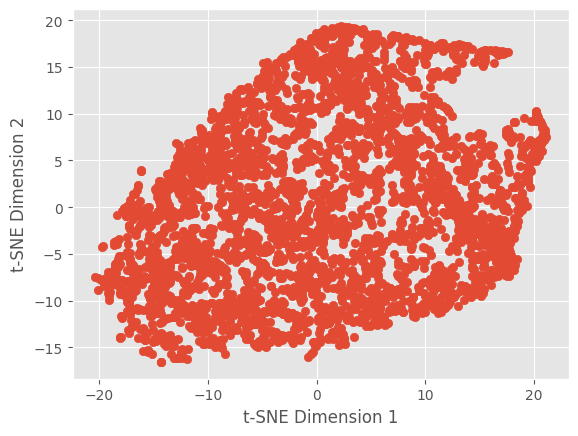

In [1151]:
from sklearn.manifold import TSNE

# Создание экземпляра t-SNE
tsne = TSNE(n_components=3) # Выберите 3 компоненты для визуализации

# Применение t-SNE к данным
transformed_data = tsne.fit_transform(df)

# Построение диаграммы рассеяния
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

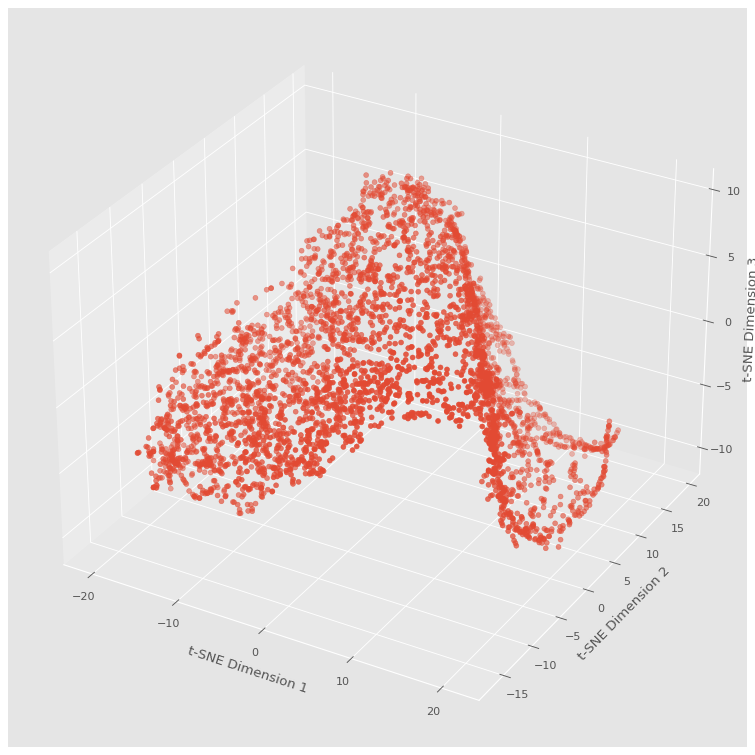

In [1152]:
# Создание экземпляра t-SNE
tsne = TSNE(n_components=3) # Выберите 3 компоненты для визуализации

# Применение t-SNE к данным
transformed_data = tsne.fit_transform(df)

# Построение трехмерной диаграммы рассеяния
fig = plt.figure(figsize=(12, 12), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2])
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()

__Вывод__: просто можно посмотреть на то, как распределены наши объекты (примерно с сохранением их свойств, насколько это возможно) на плоскости